In [ ]:
import numpy as np
import pandas as pd
import tweepy as tp
import csv
import random
import tensorflow
import keras
import sklearn 
from nltk.sentiment.util import *
import matplotlib.pyplot as mbpt

In [ ]:
authenticatin = tp.OAuthHandler('OlQUUNxH50bKtJy3oEsZBs5GW', 'PM4MO4uSe8DHEkWsaPJ1hUXm9AyXK7k8GRnSXuzL6MIvFANYyR')
authenticatin.set_access_token('1255808850789167104-8HUNhV6XfJkNeiEAJjeK8oOxMvQoN0', 'VPR3T76vTZ4Eke5hNMK4pTucGuA07A6BYFZZBBt39q8Ro')
Access_api = tp.API(authenticatin, wait_on_rate_limit=True)

In [ ]:
hashtags = ["Duke", "DukeUniversity", "DukeStudents", "DukeBlueDevils", "DukeNation", "ForeverDuke", "PictureDuke", "GoDuke", "DukeGang"]
unique_tweets = set()
tweet_list = []

for h in hashtags:
        query = h
        # Loop through search results using pagination
        for pg in tp.Cursor(Access_api.search_tweets, q = h, lang = 'en', tweet_mode = 'extended', count = 100).pages(200):
        # Loop through tweets on the page
            for t in pg:
            # Check if the tweet is a retweet or a duplicate
                if 'retweeted_status' in dir(t):
                    tweet = t.retweeted_status.full_text
                else:
                    tweet = t.full_text
                    
                tweet = re.sub(r"(#[\d\w]+)|(http\S+)", "", tweet).strip()
                
                if tweet not in unique_tweets:
                    unique_tweets.add(tweet)
                
                    tweet_list.append({ 
                        'Hashtag': h, 
                        'Date_Created': t.created_at,
                        'Username':t.user.name,
                        'Tweet': tweet,})

TweetDF = pd.DataFrame(tweet_list)
TweetDF.head()

,Hashtag,Date_Created,Username,Tweet
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D"
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...


In [111]:
TweetDF.to_csv('University_Tweets_Duke.csv', index = False)

In [112]:
# Load the data
DukeT = pd.read_csv('University_Tweets_Duke.csv', header = 0)

DukeT = DukeT.dropna(axis = 0)
DukeT = DukeT.reset_index(drop = True)
print(DukeT.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Hashtag       7106 non-null   object
 1   Date_Created  7106 non-null   object
 2   Username      7106 non-null   object
 3   Tweet         7106 non-null   object
dtypes: object(4)
memory usage: 222.2+ KB
None


In [113]:
import time
import string
import warnings

# for all NLP related operations on text
import nltk as nk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score



# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nk.download('stopwords')
nk.download('wordnet')
nk.download('opinion_lexicon')

sWords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [114]:
DukeT.head()

,Hashtag,Date_Created,Username,Tweet
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D"
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...


In [115]:
def rm_pa(tx, regex_pat):
    r = re.findall(regex_pat, tx)
    for i in r:
        tx = re.sub(i, '', tx)
    
    return tx 

In [116]:
DukeT['Duke_cleaned_tweets'] = np.vectorize(rm_pa)(DukeT['Tweet'], "@[\w]*: | *RT*")
DukeT.head(10)

,Hashtag,Date_Created,Username,Tweet,Duke_cleaned_tweets
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D","the Queen is dead, in Duke Nukem 3D"
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...,@SmiythYaslin They don’t need them. They don’...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...,rking with the duke guan. ha ha laugh. I tried...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...,Tailoring fit for royalty.\n\nDior is honored ...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...,@NeonBear007 Well at least you still have hair...
5,Duke,2023-05-07 00:09:17+00:00,Eric Carter,"Tactics V: ""Obsidian Brigade"" is a tactical tu...","Tactics V: ""Obsidian Brigade"" is a tactical tu..."
6,Duke,2023-05-07 00:09:11+00:00,Brown Skin Girl🥂,@septimusajprime This is like performing for D...,@septimusajprime This is like performing for D...
7,Duke,2023-05-07 00:09:07+00:00,Jun Ozono🇯🇵,Love this image of The Duke of Edinburgh. He d...,Love this image of The Duke of Edinburgh. He d...
8,Duke,2023-05-07 00:09:04+00:00,kopi pahit,Wow! 😍🤌🏾\n\nA closer look at the formal three-...,Wow! 😍🤌🏾\n\nA closer look at the formal three-...
9,Duke,2023-05-07 00:08:53+00:00,Raymond Norman,on .\n\nBased on the 4th child of the Duke of ...,on .\n\nBased on the 4th child of the Duke of ...


In [117]:
Duke_CT = []

for index, row in DukeT.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Duke_cleaned_tweets.split() if 'http' not in word]
    Duke_CT.append(' '.join(words_without_links))

DukeT['Duke_cleaned_tweets'] = Duke_CT
DukeT.head(10)

,Hashtag,Date_Created,Username,Tweet,Duke_cleaned_tweets
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D","the Queen is dead, in Duke Nukem 3D"
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...,@SmiythYaslin They don’t need them. They don’t...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...,rking with the duke guan. ha ha laugh. I tried...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...,Tailoring fit for royalty. Dior is honored to ...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...,@NeonBear007 Well at least you still have hair...
5,Duke,2023-05-07 00:09:17+00:00,Eric Carter,"Tactics V: ""Obsidian Brigade"" is a tactical tu...","Tactics V: ""Obsidian Brigade"" is a tactical tu..."
6,Duke,2023-05-07 00:09:11+00:00,Brown Skin Girl🥂,@septimusajprime This is like performing for D...,@septimusajprime This is like performing for D...
7,Duke,2023-05-07 00:09:07+00:00,Jun Ozono🇯🇵,Love this image of The Duke of Edinburgh. He d...,Love this image of The Duke of Edinburgh. He d...
8,Duke,2023-05-07 00:09:04+00:00,kopi pahit,Wow! 😍🤌🏾\n\nA closer look at the formal three-...,Wow! 😍🤌🏾 A closer look at the formal three-pie...
9,Duke,2023-05-07 00:08:53+00:00,Raymond Norman,on .\n\nBased on the 4th child of the Duke of ...,on . Based on the 4th child of the Duke of Man...


In [119]:
DukeT = DukeT[DukeT['Duke_cleaned_tweets']! = '']
DukeT.head(10)

,Hashtag,Date_Created,Username,Tweet,Duke_cleaned_tweets
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D","the Queen is dead, in Duke Nukem 3D"
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...,@SmiythYaslin They don’t need them. They don’t...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...,rking with the duke guan. ha ha laugh. I tried...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...,Tailoring fit for royalty. Dior is honored to ...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...,@NeonBear007 Well at least you still have hair...
5,Duke,2023-05-07 00:09:17+00:00,Eric Carter,"Tactics V: ""Obsidian Brigade"" is a tactical tu...","Tactics V: ""Obsidian Brigade"" is a tactical tu..."
6,Duke,2023-05-07 00:09:11+00:00,Brown Skin Girl🥂,@septimusajprime This is like performing for D...,@septimusajprime This is like performing for D...
7,Duke,2023-05-07 00:09:07+00:00,Jun Ozono🇯🇵,Love this image of The Duke of Edinburgh. He d...,Love this image of The Duke of Edinburgh. He d...
8,Duke,2023-05-07 00:09:04+00:00,kopi pahit,Wow! 😍🤌🏾\n\nA closer look at the formal three-...,Wow! 😍🤌🏾 A closer look at the formal three-pie...
9,Duke,2023-05-07 00:08:53+00:00,Raymond Norman,on .\n\nBased on the 4th child of the Duke of ...,on . Based on the 4th child of the Duke of Man...


In [121]:
DukeT.drop_duplicates(subset=['Duke_cleaned_tweets'], keep = False)
DukeT.head(10)

,Hashtag,Date_Created,Username,Tweet,Duke_cleaned_tweets
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D","the Queen is dead, in Duke Nukem 3D"
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...,@SmiythYaslin They don’t need them. They don’t...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...,rking with the duke guan. ha ha laugh. I tried...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...,Tailoring fit for royalty. Dior is honored to ...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...,@NeonBear007 Well at least you still have hair...
5,Duke,2023-05-07 00:09:17+00:00,Eric Carter,"Tactics V: ""Obsidian Brigade"" is a tactical tu...","Tactics V: ""Obsidian Brigade"" is a tactical tu..."
6,Duke,2023-05-07 00:09:11+00:00,Brown Skin Girl🥂,@septimusajprime This is like performing for D...,@septimusajprime This is like performing for D...
7,Duke,2023-05-07 00:09:07+00:00,Jun Ozono🇯🇵,Love this image of The Duke of Edinburgh. He d...,Love this image of The Duke of Edinburgh. He d...
8,Duke,2023-05-07 00:09:04+00:00,kopi pahit,Wow! 😍🤌🏾\n\nA closer look at the formal three-...,Wow! 😍🤌🏾 A closer look at the formal three-pie...
9,Duke,2023-05-07 00:08:53+00:00,Raymond Norman,on .\n\nBased on the 4th child of the Duke of ...,on . Based on the 4th child of the Duke of Man...


In [122]:
DukeT = DukeT.reset_index(drop = True)
DukeT.head(10)

,Hashtag,Date_Created,Username,Tweet,Duke_cleaned_tweets
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D","the Queen is dead, in Duke Nukem 3D"
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...,@SmiythYaslin They don’t need them. They don’t...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...,rking with the duke guan. ha ha laugh. I tried...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...,Tailoring fit for royalty. Dior is honored to ...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...,@NeonBear007 Well at least you still have hair...
5,Duke,2023-05-07 00:09:17+00:00,Eric Carter,"Tactics V: ""Obsidian Brigade"" is a tactical tu...","Tactics V: ""Obsidian Brigade"" is a tactical tu..."
6,Duke,2023-05-07 00:09:11+00:00,Brown Skin Girl🥂,@septimusajprime This is like performing for D...,@septimusajprime This is like performing for D...
7,Duke,2023-05-07 00:09:07+00:00,Jun Ozono🇯🇵,Love this image of The Duke of Edinburgh. He d...,Love this image of The Duke of Edinburgh. He d...
8,Duke,2023-05-07 00:09:04+00:00,kopi pahit,Wow! 😍🤌🏾\n\nA closer look at the formal three-...,Wow! 😍🤌🏾 A closer look at the formal three-pie...
9,Duke,2023-05-07 00:08:53+00:00,Raymond Norman,on .\n\nBased on the 4th child of the Duke of ...,on . Based on the 4th child of the Duke of Man...


In [123]:
DukeT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hashtag              7106 non-null   object
 1   Date_Created         7106 non-null   object
 2   Username             7106 non-null   object
 3   Tweet                7106 non-null   object
 4   Duke_cleaned_tweets  7106 non-null   object
dtypes: object(5)
memory usage: 277.7+ KB


In [124]:
DukeT['Duke_cleaned_tweets'] = DukeT['Duke_cleaned_tweets'].str.replace("[^a-zA-Z# ]", "")
DukeT.head(10)

<ipython-input-124-9031760447e9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  DukeT['Duke_cleaned_tweets'] = DukeT['Duke_cleaned_tweets'].str.replace("[^a-zA-Z# ]", "")


,Hashtag,Date_Created,Username,Tweet,Duke_cleaned_tweets
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D",the Queen is dead in Duke Nukem D
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...,SmiythYaslin They dont need them They dont eve...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...,rking with the duke guan ha ha laugh I tried t...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...,Tailoring fit for royalty Dior is honored to h...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...,NeonBear Well at least you still have hair on ...
5,Duke,2023-05-07 00:09:17+00:00,Eric Carter,"Tactics V: ""Obsidian Brigade"" is a tactical tu...",Tactics V Obsidian Brigade is a tactical turnb...
6,Duke,2023-05-07 00:09:11+00:00,Brown Skin Girl🥂,@septimusajprime This is like performing for D...,septimusajprime This is like performing for Da...
7,Duke,2023-05-07 00:09:07+00:00,Jun Ozono🇯🇵,Love this image of The Duke of Edinburgh. He d...,Love this image of The Duke of Edinburgh He de...
8,Duke,2023-05-07 00:09:04+00:00,kopi pahit,Wow! 😍🤌🏾\n\nA closer look at the formal three-...,Wow A closer look at the formal threepiece su...
9,Duke,2023-05-07 00:08:53+00:00,Raymond Norman,on .\n\nBased on the 4th child of the Duke of ...,on Based on the th child of the Duke of Manch...


In [126]:
sWords_set = set(sWords)
cleaned_tweets = []

for index, row in DukeT.iterrows():
    
    wws = [w for w in row.Duke_cleaned_tweets.split() if not w in sWords_set and '#' not in w.lower()]
    
    cleaned_tweets.append(' '.join(wws))
    
DukeT['Duke_cleaned_tweets'] = cleaned_tweets
DukeT.head(10)


,Hashtag,Date_Created,Username,Tweet,Duke_cleaned_tweets
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D",Queen dead Duke Nukem D
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...,SmiythYaslin They dont need They dont even nee...
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...,rking duke guan ha ha laugh I tried smothe r w...
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...,Tailoring fit royalty Dior honored dressed Pri...
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...,NeonBear Well least still hair head
5,Duke,2023-05-07 00:09:17+00:00,Eric Carter,"Tactics V: ""Obsidian Brigade"" is a tactical tu...",Tactics V Obsidian Brigade tactical turnbased ...
6,Duke,2023-05-07 00:09:11+00:00,Brown Skin Girl🥂,@septimusajprime This is like performing for D...,septimusajprime This like performing David duke
7,Duke,2023-05-07 00:09:07+00:00,Jun Ozono🇯🇵,Love this image of The Duke of Edinburgh. He d...,Love image The Duke Edinburgh He definitely en...
8,Duke,2023-05-07 00:09:04+00:00,kopi pahit,Wow! 😍🤌🏾\n\nA closer look at the formal three-...,Wow A closer look formal threepiece suit speci...
9,Duke,2023-05-07 00:08:53+00:00,Raymond Norman,on .\n\nBased on the 4th child of the Duke of ...,Based th child Duke Manchester Kylemore castle...


In [127]:
DukeT.to_csv('University_Clean_Tweets_Duke.csv', index = False)

In [129]:
# Bag-of-words 
bow_vectorizer = CountVectorizer()
BOW_features = bow_vectorizer.fit_transform(DukeT['Duke_cleaned_tweets'])

# TF-IDF 
tif_vectorizer = TfidfVectorizer()
tif_features = tif_vectorizer.fit_transform(DukeT['Duke_cleaned_tweets'])

# Printing the feature matrices
print("Bag-of-words features:\n", BOW_features.toarray())
print("\nTF-IDF features:\n", tif_features.toarray())

Bag-of-words features:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

TF-IDF features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [130]:
pWords = set(nltk.corpus.opinion_lexicon.positive())
nWords = set(nltk.corpus.opinion_lexicon.negative())


def label_class(text):
    pCount = 0
    nCount = 0
    ws = text.split()
    for word in ws:
        if word in pWords:
            pCount += 1
        if word in nWords:
            nCount += 1

    if pCount > nCount:
        return 'positive'
    else:
        return 'negative'

In [133]:
st_labels = []
for tw in DukeT['Duke_cleaned_tweets']:
    lb = label_class(tw)
    st_labels.append(lb)


DukeT['Sentiment'] = st_labels


In [160]:
DukeT['Sentiment'].value_counts()

negative    5202
positive    1904
Name: Sentiment, dtype: int64

In [134]:
DukeT.to_csv('University_Clean_Tweets_Label_Duke.csv', index = False)

In [135]:
DukeT.head(10)

,Hashtag,Date_Created,Username,Tweet,Duke_cleaned_tweets,Sentiment
0,Duke,2023-05-07 00:09:35+00:00,gamefriend,"the Queen is dead, in Duke Nukem 3D",Queen dead Duke Nukem D,negative
1,Duke,2023-05-07 00:09:33+00:00,Shesaidno1997,@SmiythYaslin They don’t need them. They don’...,SmiythYaslin They dont need They dont even nee...,positive
2,Duke,2023-05-07 00:09:27+00:00,1对1❤️欢迎比价/下单看主页/语音/视频/调教/女s/女m/连麦,rking with the duke guan. ha ha laugh. I tried...,rking duke guan ha ha laugh I tried smothe r w...,negative
3,Duke,2023-05-07 00:09:24+00:00,Telma Cosentino,Tailoring fit for royalty.\n\nDior is honored ...,Tailoring fit royalty Dior honored dressed Pri...,positive
4,Duke,2023-05-07 00:09:20+00:00,👑Red Dirt Duke👑,@NeonBear007 Well at least you still have hair...,NeonBear Well least still hair head,negative
5,Duke,2023-05-07 00:09:17+00:00,Eric Carter,"Tactics V: ""Obsidian Brigade"" is a tactical tu...",Tactics V Obsidian Brigade tactical turnbased ...,negative
6,Duke,2023-05-07 00:09:11+00:00,Brown Skin Girl🥂,@septimusajprime This is like performing for D...,septimusajprime This like performing David duke,positive
7,Duke,2023-05-07 00:09:07+00:00,Jun Ozono🇯🇵,Love this image of The Duke of Edinburgh. He d...,Love image The Duke Edinburgh He definitely en...,positive
8,Duke,2023-05-07 00:09:04+00:00,kopi pahit,Wow! 😍🤌🏾\n\nA closer look at the formal three-...,Wow A closer look formal threepiece suit speci...,negative
9,Duke,2023-05-07 00:08:53+00:00,Raymond Norman,on .\n\nBased on the 4th child of the Duke of ...,Based th child Duke Manchester Kylemore castle...,negative


In [137]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer = Tokenizer(num_words = 6000)

# Tokenizing
tokenizer.fit_on_texts(DukeT['Duke_cleaned_tweets'].tolist())

# Generating sequences & apply padding
sequences = tokenizer.texts_to_sequences(DukeT['Duke_cleaned_tweets'].tolist())

length = max([len(x) for x in sequences])
Duke_padded = tensorflow.keras.preprocessing.sequence.pad_sequences(sequences, padding = 'post', maxlen = length)


In [138]:
# Splitting dataset into training and testing
from sklearn.model_selection import train_test_split

# define the target variable
Duke_target_label = DukeT['Sentiment'] 

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Duke_padded, Duke_target_label, test_size=0.2, random_state=42)


In [139]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, GRU, Dense, Reshape, MaxPooling1D, Dropout


# define the model architecture
DTSAmodel = Sequential()

DTSAmodel.add(Embedding(6000, 64, input_length = length))

DTSAmodel.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True))

DTSAmodel.add(Conv1D(64, kernel_size = 3, padding = 'same', activation = 'relu'))
DTSAmodel.add(MaxPooling1D(pool_size = 2))
DTSAmodel.add(Dropout(0.2))

DTSAmodel.add(GRU(16, dropout = 0.2, recurrent_dropout = 0.2))
DTSAmodel.add(Dense(1, activation = 'sigmoid'))


DTSAmodel.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 46, 64)            384000    
                                                                 
 lstm_8 (LSTM)               (None, 46, 32)            12416     
                                                                 
 conv1d_11 (Conv1D)          (None, 46, 64)            6208      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 23, 64)           0         
 g1D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 23, 64)            0         
                                                                 
 gru_9 (GRU)                 (None, 16)                3936      
                                                      

In [144]:
# Compile the model
DTSAmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [145]:
# Training the model
from sklearn.preprocessing import LabelEncoder

# OneHot Encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

history = DTSAmodel.fit(X_train, y_train, epochs = 15, batch_size = 64, validation_data=(X_test, y_test))


Epoch 1/15
89/89 [==============================] - 21s 151ms/step - loss: 0.5914 - accuracy: 0.7227 - val_loss: 0.5718 - val_accuracy: 0.7405
Epoch 2/15
89/89 [==============================] - 13s 148ms/step - loss: 0.4971 - accuracy: 0.7694 - val_loss: 0.3880 - val_accuracy: 0.8340
Epoch 3/15
89/89 [==============================] - 13s 147ms/step - loss: 0.2784 - accuracy: 0.8936 - val_loss: 0.4267 - val_accuracy: 0.8172
Epoch 4/15
89/89 [==============================] - 12s 132ms/step - loss: 0.1657 - accuracy: 0.9446 - val_loss: 0.4459 - val_accuracy: 0.8256
Epoch 5/15
89/89 [==============================] - 12s 133ms/step - loss: 0.1209 - accuracy: 0.9611 - val_loss: 0.5795 - val_accuracy: 0.8193
Epoch 6/15
89/89 [==============================] - 13s 147ms/step - loss: 0.0967 - accuracy: 0.9715 - val_loss: 0.6096 - val_accuracy: 0.8263
Epoch 7/15
89/89 [==============================] - 13s 148ms/step - loss: 0.0654 - accuracy: 0.9824 - val_loss: 0.6805 - val_accuracy: 0.8193

In [148]:
# Predicting test data
y_predicted = DTSAmodel.predict(X_test)

pred_label = [1 if p > 0.5 else 0 for p in y_predicted]

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_label)

print(f'Test accuracy: {accuracy*100}%')


45/45 [==============================] - 1s 14ms/step
Test accuracy: 83.19268635724332%


45/45 [==============================] - 1s 23ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1053
           1       0.69      0.63      0.66       369

    accuracy                           0.83      1422
   macro avg       0.78      0.77      0.78      1422
weighted avg       0.83      0.83      0.83      1422



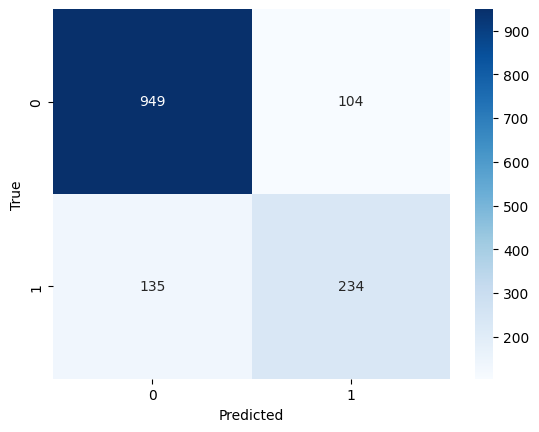

In [149]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Pred_label = (DTSAmodel.predict(X_test) > 0.5).astype("int32")

Pred_label = np.squeeze(Pred_label)

# Classication Report
from sklearn.metrics import classification_report

print(classification_report(y_test, Pred_label))

# Confusion matrix
cm = confusion_matrix(y_test, Pred_label)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [157]:
# Testing sentences
sentences = [
    "I am angry.",
    "I really like the new design of your website!",
    "I’m not sure if I like the new design.",
    "I'm feeling so grateful for all the support I've received. It's truly uplifting.",
    "It was the best experience.",
    "The new design is awful!.",
    "I enjoyed this program.",
    "I feel sad.",
    "The movie was absolutely fantastic! I loved every minute of it.",
    "The food was delicious.",
    "High quality pants. Very comfortable and great for sport activities. Good price for nice quality! I recommend to all fans of sports.",
    "I'm feeling neutral.",
    "Not impressed.",
    "Loving it!"

]

test_sen = tokenizer.texts_to_sequences(sentences)
Test_sen_pad = pad_sequences(test_sen, maxlen = length, padding = 'post', truncating = 'post')

# Predicting sentiment for new sequences of sentence
pred = DTSAmodel.predict(Test_sen_pad)
pred_senti = (pred > 0.5).astype(int)

# Printing predicted sentiments
print("\n")
print("Test_Sentences -----  Sentiment_Labels \n")
for i in range(len(sentences)):
    print(sentences[i], ' ----- ', 'positive' if pred_senti[i] == 1 else 'negative')

1/1 [==============================] - 0s 130ms/step


Test_Sentences -----  Sentiment_Labels 

I am angry.  -----  negative
I really like the new design of your website!  -----  positive
I’m not sure if I like the new design.  -----  positive
I'm feeling so grateful for all the support I've received. It's truly uplifting.  -----  positive
It was the best experience.  -----  positive
The new design is awful!.  -----  negative
I enjoyed this program.  -----  positive
I feel sad.  -----  negative
The movie was absolutely fantastic! I loved every minute of it.  -----  positive
The food was delicious.  -----  negative
High quality pants. Very comfortable and great for sport activities. Good price for nice quality! I recommend to all fans of sports.  -----  positive
I'm feeling neutral.  -----  negative
Not impressed.  -----  negative
Loving it!  -----  positive
